In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [5]:
df.shape

(1067, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
for i in df.columns:
    print(df[i].unique())

[2014]
['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']
['ILX' 'ILX HYBRID' 'MDX 4WD' 'RDX AWD' 'RLX' 'TL' 'TL AWD' 'TSX' 'DB9'
 'RAPIDE' 'V8 VANTAGE' 'V8 VANTAGE S' 'VANQUISH' 'A4' 'A4 QUATTRO'
 'A5 CABRIOLET QUATTRO' 'A5 QUATTRO' 'A6 QUATTRO'
 'A6 QUATTRO TDI CLEAN DIESEL' 'A7 QUATTRO' 'A7 QUATTRO TDI CLEAN DIESEL'
 'A8' 'A8 TDI CLEAN DIESEL' 'A8L' 'A8L TDI CLEAN DIESEL' 'ALLROAD QUATTRO'
 'Q5' 'Q5 HYBRID' 'Q5 TDI CLEAN DIESEL' 'Q7' 'Q7 TDI CLEAN DIESEL' 'R8'
 'R8 SPYDER' 'RS5' 'RS5 CABRIOLET' 'RS7' 'S4' 'S5' 'S5 CABRIOLET' 'S6'
 'S7' 'S8' 'SQ5' 'TT COUPE QUATTRO' 'TT ROADSTER QUATTRO'
 'TTS COUPE QUATTRO' 'TTS ROADSTER QUATTRO' 'CONTINENTAL GT'
 'CONTINENTAL GT CO

In [9]:
df.notnull().sum()

MODELYEAR                   1067
MAKE                        1067
MODEL                       1067
VEHICLECLASS                1067
ENGINESIZE                  1067
CYLINDERS                   1067
TRANSMISSION                1067
FUELTYPE                    1067
FUELCONSUMPTION_CITY        1067
FUELCONSUMPTION_HWY         1067
FUELCONSUMPTION_COMB        1067
FUELCONSUMPTION_COMB_MPG    1067
CO2EMISSIONS                1067
dtype: int64

In [10]:
df.isnull().nunique()

MODELYEAR                   1
MAKE                        1
MODEL                       1
VEHICLECLASS                1
ENGINESIZE                  1
CYLINDERS                   1
TRANSMISSION                1
FUELTYPE                    1
FUELCONSUMPTION_CITY        1
FUELCONSUMPTION_HWY         1
FUELCONSUMPTION_COMB        1
FUELCONSUMPTION_COMB_MPG    1
CO2EMISSIONS                1
dtype: int64

In [11]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

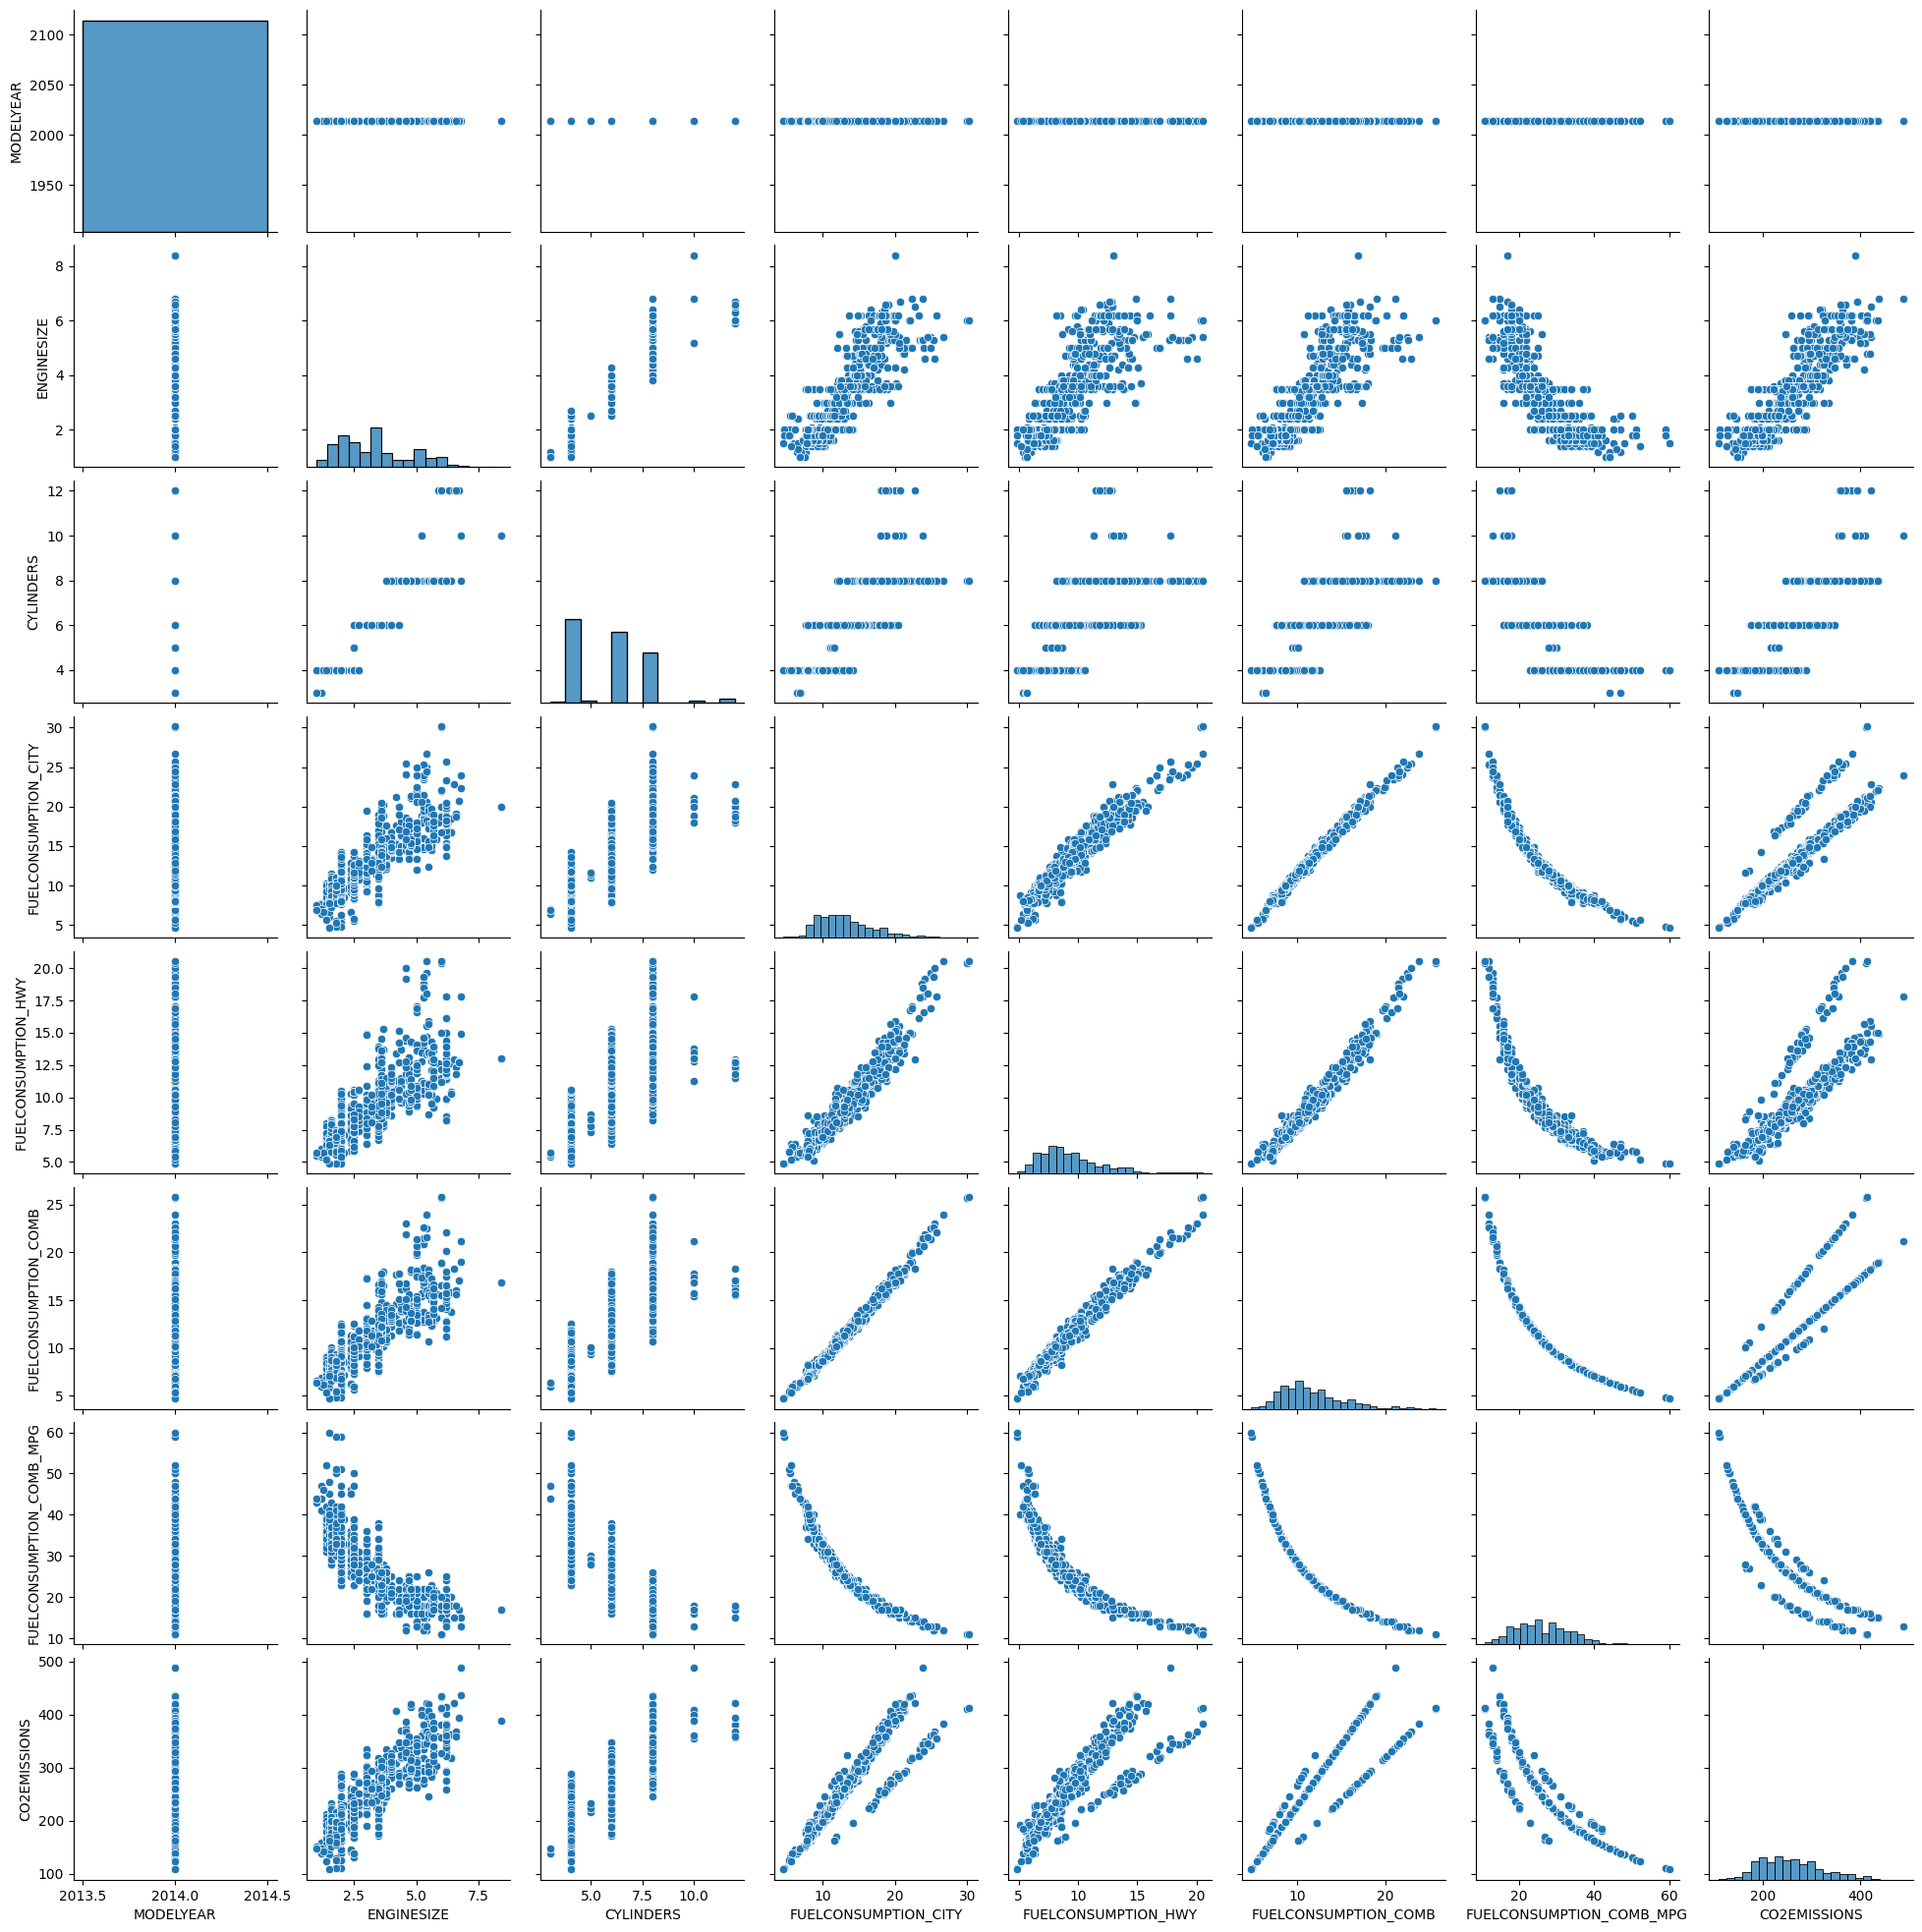

In [12]:
sns.pairplot(df)

In [13]:
df = df._get_numeric_data()

In [14]:
df

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


In [15]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<Axes: >

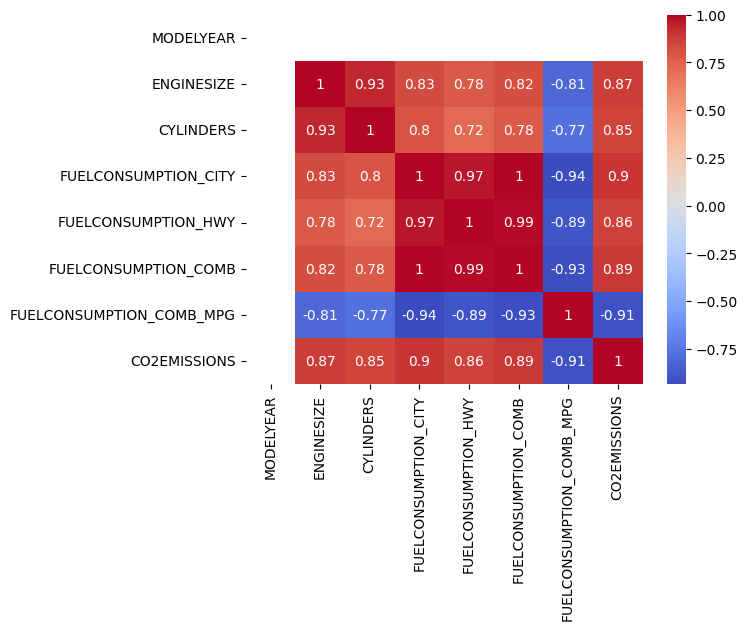

In [16]:
sns.heatmap(df.corr(), cmap= "coolwarm", annot= True)

In [17]:
X = df.drop("CO2EMISSIONS", axis= 1)
y = df["CO2EMISSIONS"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 75)

In [19]:
X_train.shape

(800, 7)

In [20]:
X_test.shape

(267, 7)

In [21]:
y_train.shape

(800,)

In [22]:
y_test.shape

(267,)

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
lr.intercept_

250.3087103322223

In [26]:
lr.coef_

array([ 0.        ,  7.22404389,  8.09904254, -7.69838959, -1.33025379,
       13.11882057, -3.85437078])

In [27]:
y_predict = lr.predict(X_test)

In [28]:
mae = mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 14.778887214261578


In [29]:
mse = mean_squared_error(y_test, y_predict)
print("Mean Square Error:", mse)

Mean Square Error: 500.6661959187736


In [30]:
r2 = r2_score(y_test, y_predict)
print("Root Mean Square Error:", r2)

Root Mean Square Error: 0.8837255164224078


In [31]:
lr_model = pd.DataFrame({"Actual value": y_test, "Predicted value": y_predict})
lr_model.head()

,Actual value,Predicted value
632,246,235.714341
371,366,341.059892
768,276,292.153487
878,248,259.384063
817,191,192.040307


C:\Users\Hediye\AppData\Local\Temp\ipykernel_23408\915442562.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color = "b", label= "True values", hist= False)
C:\Users\Hediye\AppData\Local\Temp\ipykernel_23408\915442562.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

<Axes: xlabel='CO2EMISSIONS', ylabel='Density'>

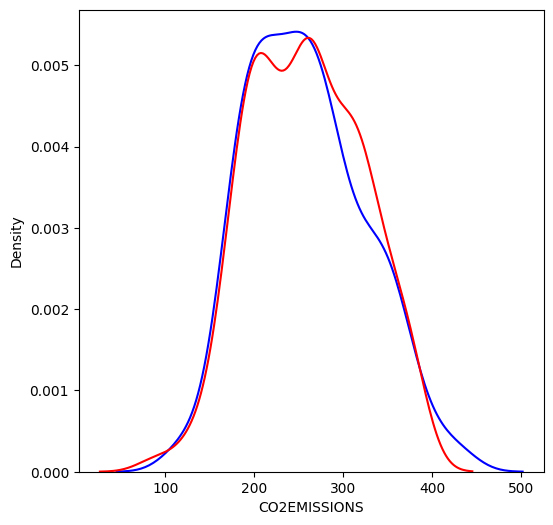

In [32]:
plt.figure(figsize= (6, 6))

ax = sns.distplot(y_test, color = "b", label= "True values", hist= False)
sns.distplot(y_predict, color= "r", label= "Predicted values", hist= False )